In [2]:
import pygmt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

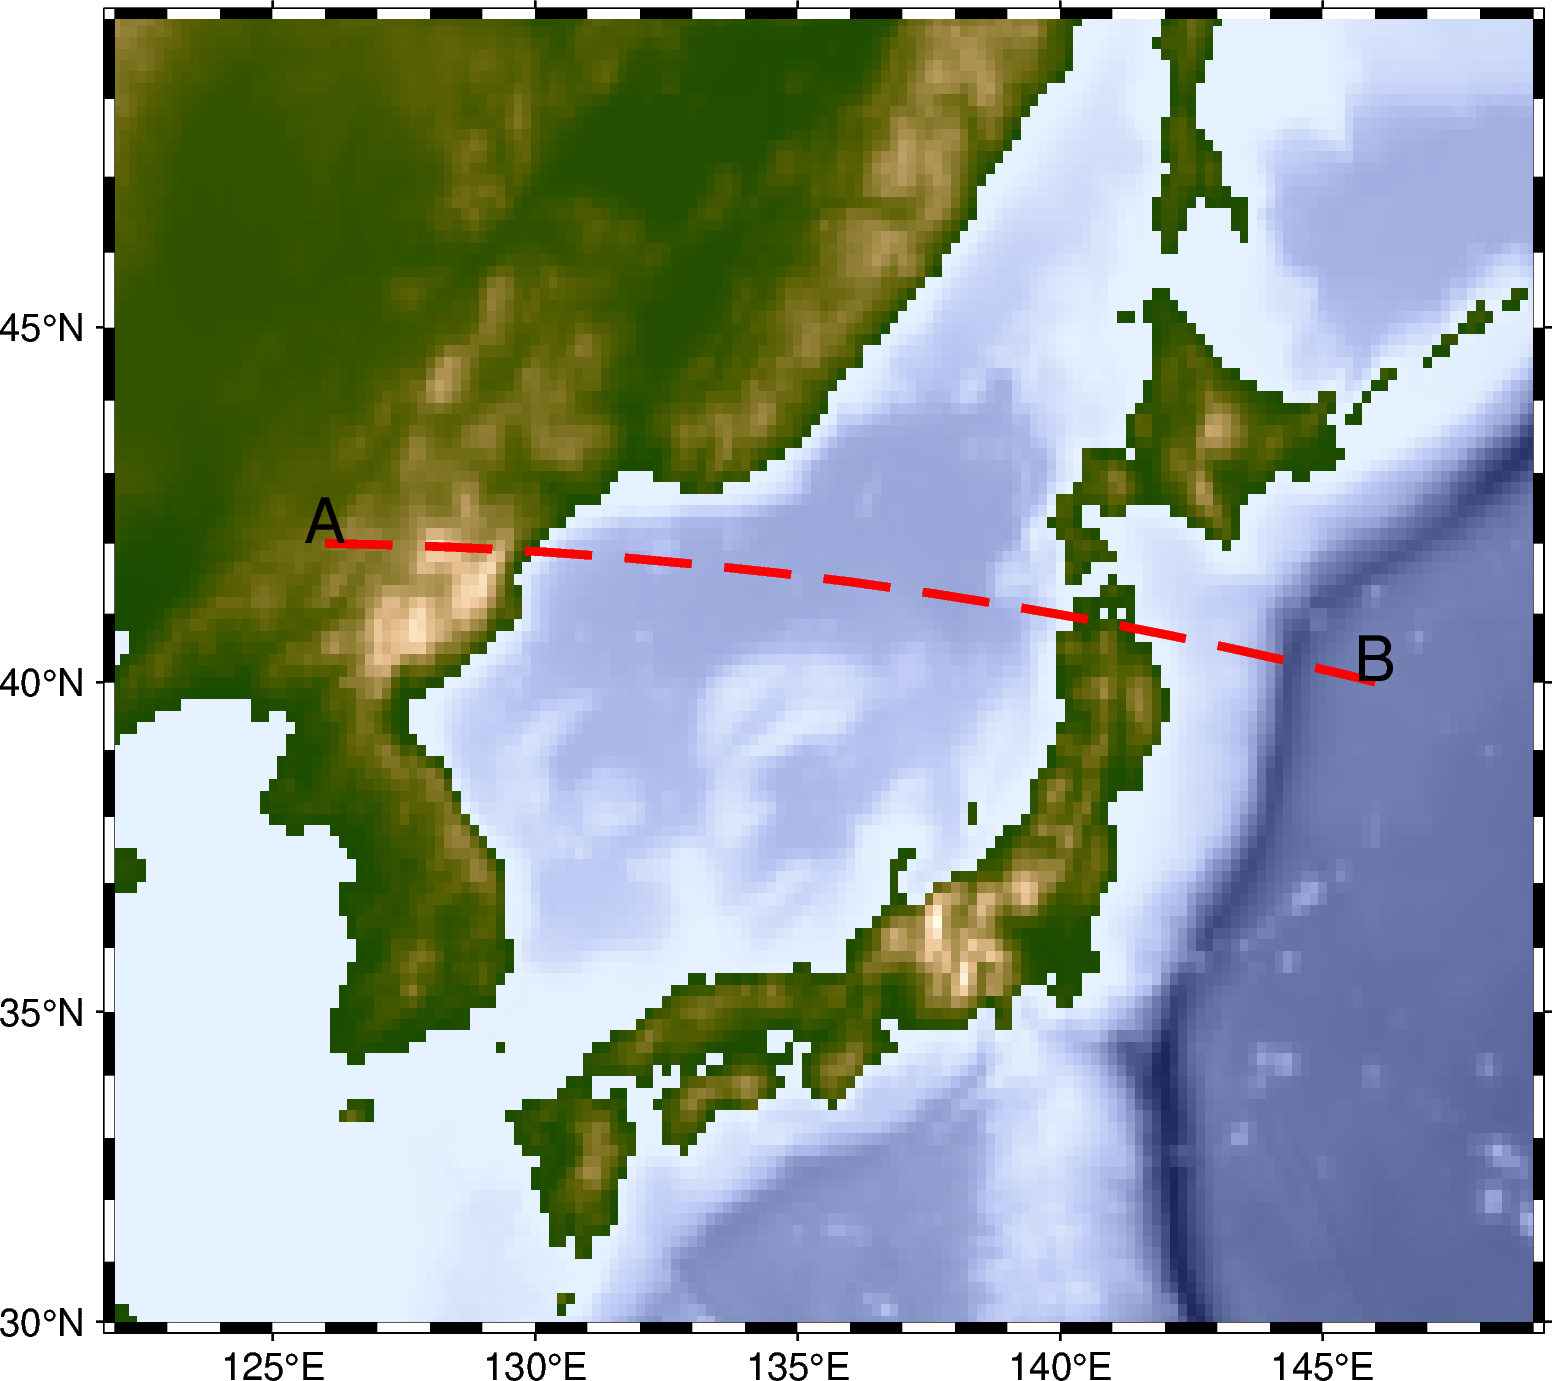

'\n# ----------------------------------------------------------------------------\n# Top: Elevation along survey line\n\n# Shift plot origin to the top by the height of the map ("+h") plus 1.5 centimeters\nfig.shift_origin(yshift="h+1.5c")\n\nfig.basemap(\n    region=[0, 15, -8000, 6000],  # x_min, x_max, y_min, y_max\n    # Cartesian projection with a width of 12 centimeters and a height of 3 centimeters\n    projection="X12c/3c",\n    # Add annotations ("a") and ticks ("f") as well as labels ("+l") at the west or\n    # left and south or bottom sides ("WSrt")\n    frame=["WSrt", "xa2f1+lDistance+u°", "ya4000+lElevation / m"],\n)\n\n# Add labels "A" and "B" for the start and end points of the survey line\nfig.text(\n    x=[0, 15],\n    y=[7000, 7000],\n    text=["A", "B"],\n    no_clip=True,  # Do not clip text that fall outside the plot bounds\n    font="10p",  # Use a font size of 10 points\n)\n\n# Generate points along a great circle corresponding to the survey line and store them\

In [24]:
## Working Copy

import pygmt

# Define region of study area
# lon_min, lon_max, lat_min, lat_max in degrees East and North
region_map = [122, 149, 30, 49]

# Create a new pygmt.Figure instance
fig = pygmt.Figure()

# ----------------------------------------------------------------------------
# Bottom: Map of elevation in study area

# Set up basic map using a Mercator projection with a width of 12 centimeters
fig.basemap(region=region_map, projection="M12c", frame="af")

# Download grid for Earth relief with a resolution of 10 arc-minutes and gridline
# registration [Default]
grid_map = pygmt.datasets.load_earth_relief(resolution="10m", region=region_map)

# Plot the downloaded grid with color-coding based on the elevation
fig.grdimage(grid=grid_map, cmap="oleron")

"""
# Add a colorbar for the elevation
fig.colorbar(
    # Place the colorbar inside the plot (lowercase "j") in the Bottom Right (BR)
    # corner with an offset ("+o") of 0.7 centimeters and 0.3 centimeters in x or y
    # directions, respectively; move the x label above the horizontal colorbar ("+ml")
    position="jBR+o0.7c/0.8c+h+w5c/0.3c+ml",
    # Add a box around the colobar with a fill ("+g") in "white" color and a
    # transparency ("@") of 30 % and with a 0.8-points thick, black, outline ("+p")
    box="+gwhite@30+p0.8p,black",
    # Add x and y labels ("+l")
    frame=["x+lElevation", "y+lm"],
)
"""
# Choose a survey line
fig.plot(
    x=[126, 146],  # Longitude in degrees East
    y=[42, 40],  # Latitude in degrees North
    # Draw a 2-points thick, red, dashed line for the survey line
    pen="2p,red,dashed",
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[126, 146],
    y=[42, 40],
    text=["A", "B"],
    offset="0c/0.2c",  # Move text 0.2 centimeters up (y direction)
    font="15p",  # Use a font size of 15 points
)

fig.show()
"""
# ----------------------------------------------------------------------------
# Top: Elevation along survey line

# Shift plot origin to the top by the height of the map ("+h") plus 1.5 centimeters
fig.shift_origin(yshift="h+1.5c")

fig.basemap(
    region=[0, 15, -8000, 6000],  # x_min, x_max, y_min, y_max
    # Cartesian projection with a width of 12 centimeters and a height of 3 centimeters
    projection="X12c/3c",
    # Add annotations ("a") and ticks ("f") as well as labels ("+l") at the west or
    # left and south or bottom sides ("WSrt")
    frame=["WSrt", "xa2f1+lDistance+u°", "ya4000+lElevation / m"],
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[0, 15],
    y=[7000, 7000],
    text=["A", "B"],
    no_clip=True,  # Do not clip text that fall outside the plot bounds
    font="10p",  # Use a font size of 10 points
)

# Generate points along a great circle corresponding to the survey line and store them
# in a pandas.DataFrame
track_df = pygmt.project(
    center=[126, 42],  # Start point of survey line (longitude, latitude)
    endpoint=[146, 40],  # End point of survey line (longitude, latitude)
    generate=0.1,  # Output data in steps of 0.1 degrees
)

# Extract the elevation at the generated points from the downloaded grid and add it as
# new column "elevation" to the pandas.DataFrame
track_df = pygmt.grdtrack(grid=grid_map, points=track_df, newcolname="elevation")

# Plot water masses
fig.plot(
    x=[0, 15],
    y=[0, 0],
    fill="lightblue",  # Fill the polygon in "lightblue"
    # Draw a 0.25-points thick, black, solid outline
    pen="0.25p,black,solid",
    close="+y-8000",  # Force closed polygon
)

# Plot elevation along the survey line
fig.plot(
    x=track_df.p,
    y=track_df.elevation,
    fill="gray",  # Fill the polygon in "gray"
    # Draw a 1-point thick, black, solid outline
    pen="1p,black,solid",
    close="+y-8000",  # Force closed polygon
)

fig.show()
"""

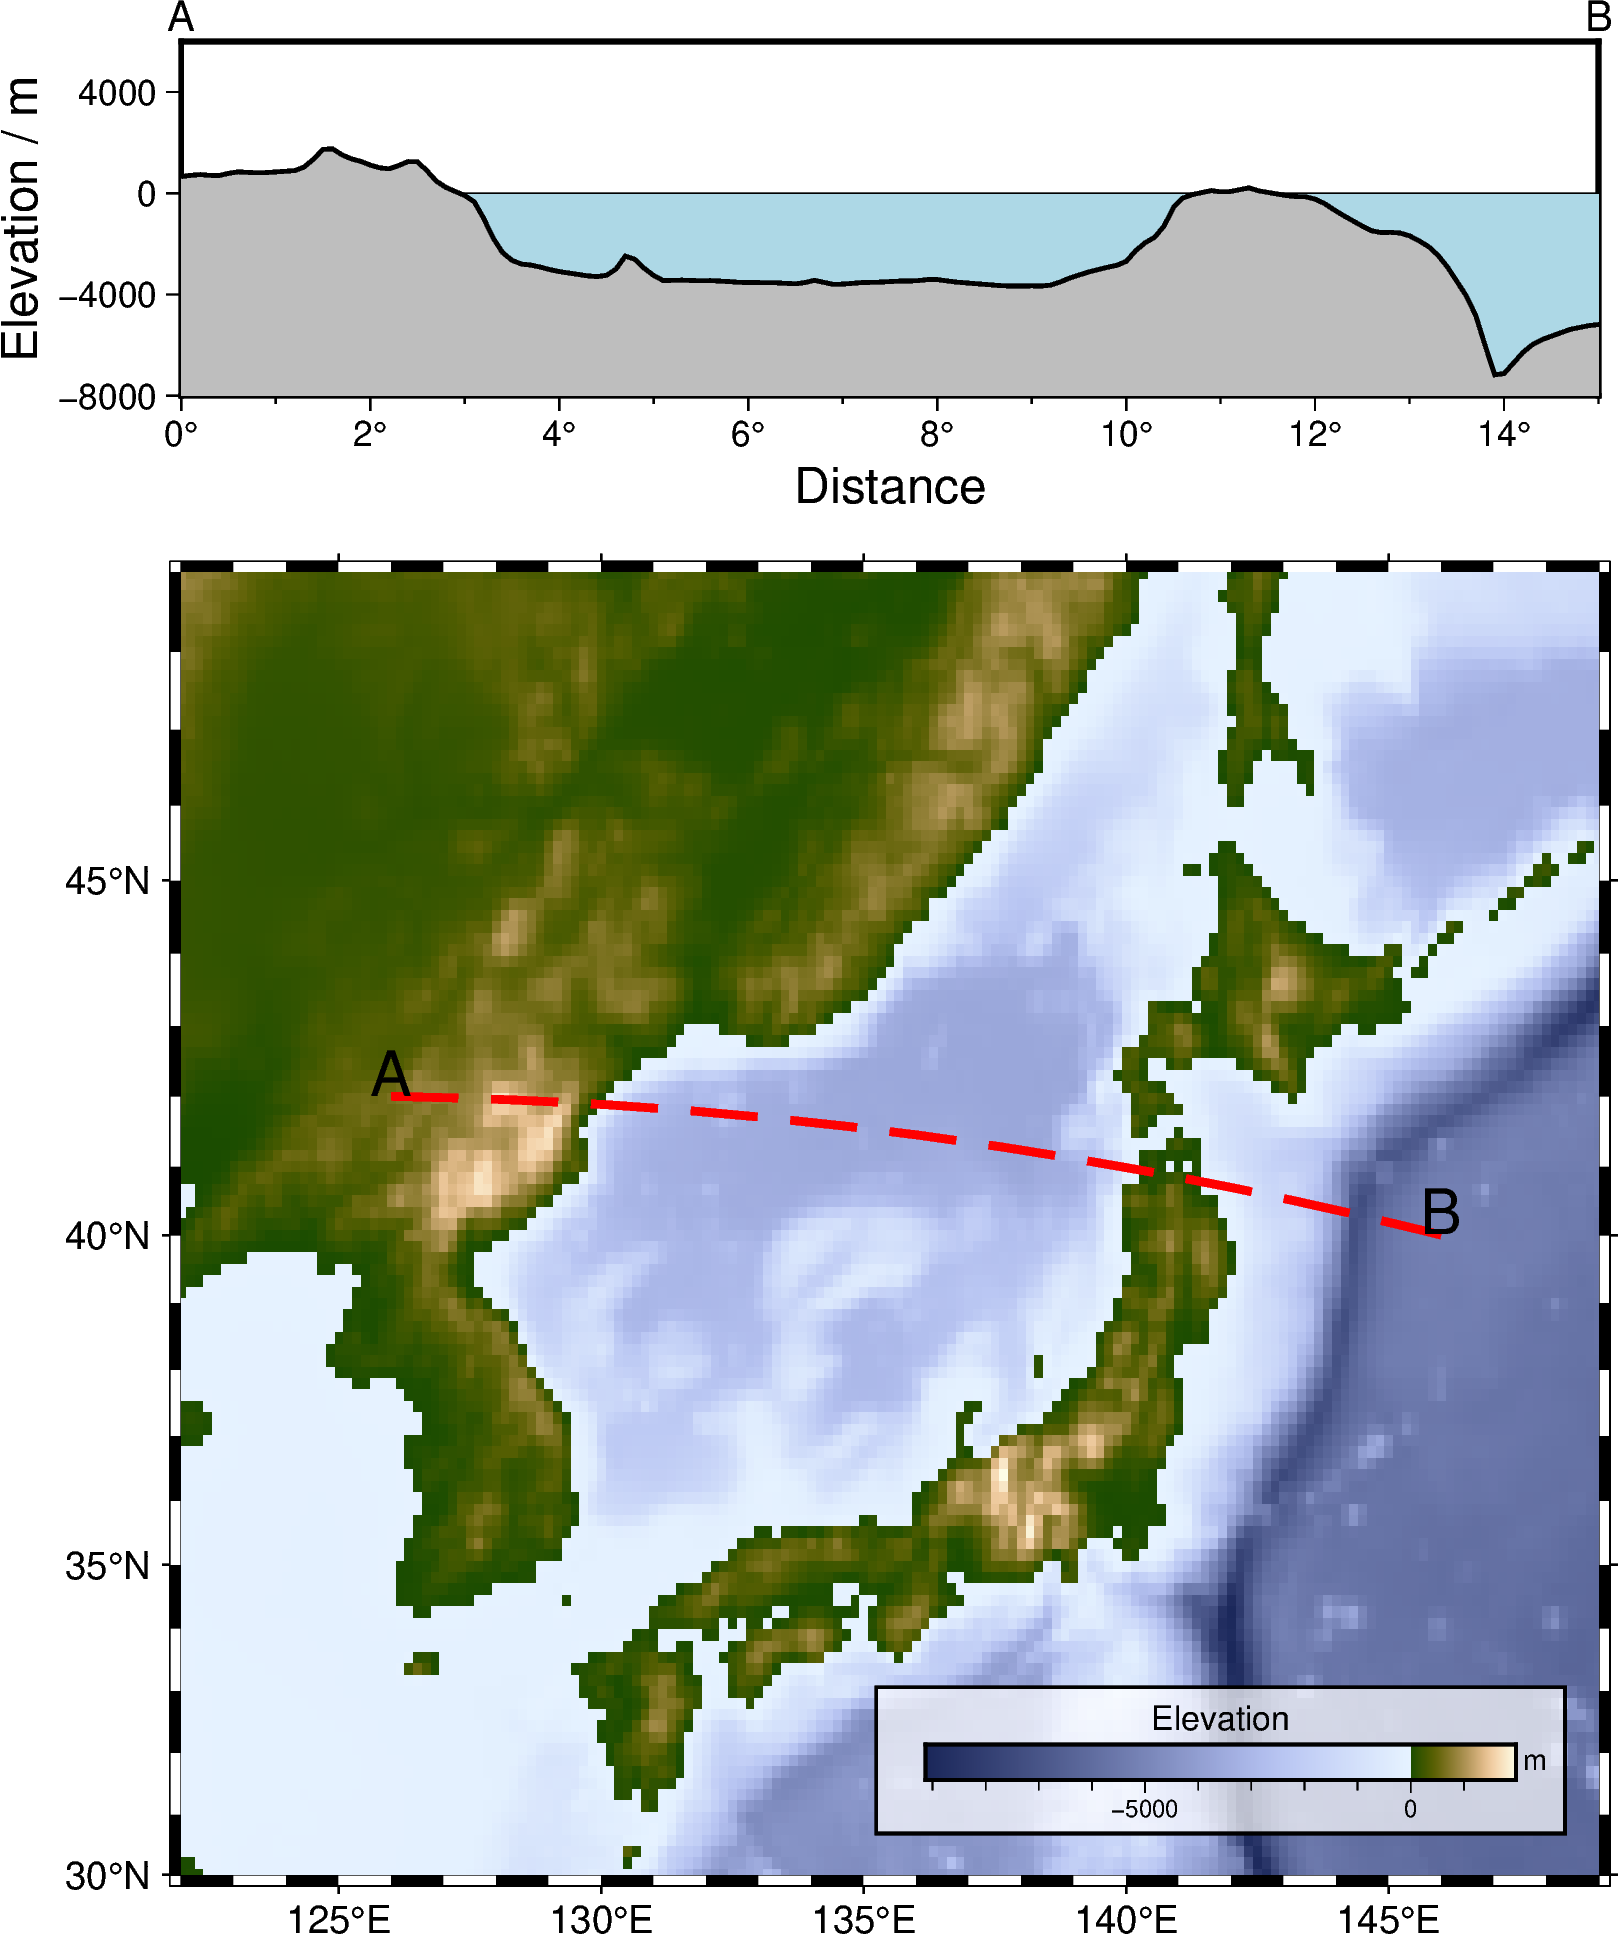

In [2]:
## Base Code Sample Template Code

import pygmt

# Define region of study area
# lon_min, lon_max, lat_min, lat_max in degrees East and North
region_map = [122, 149, 30, 49]

# Create a new pygmt.Figure instance
fig = pygmt.Figure()

# ----------------------------------------------------------------------------
# Bottom: Map of elevation in study area

# Set up basic map using a Mercator projection with a width of 12 centimeters
fig.basemap(region=region_map, projection="M12c", frame="af")

# Download grid for Earth relief with a resolution of 10 arc-minutes and gridline
# registration [Default]
grid_map = pygmt.datasets.load_earth_relief(resolution="10m", region=region_map)

# Plot the downloaded grid with color-coding based on the elevation
fig.grdimage(grid=grid_map, cmap="oleron")

# Add a colorbar for the elevation
fig.colorbar(
    # Place the colorbar inside the plot (lowercase "j") in the Bottom Right (BR)
    # corner with an offset ("+o") of 0.7 centimeters and 0.3 centimeters in x or y
    # directions, respectively; move the x label above the horizontal colorbar ("+ml")
    position="jBR+o0.7c/0.8c+h+w5c/0.3c+ml",
    # Add a box around the colobar with a fill ("+g") in "white" color and a
    # transparency ("@") of 30 % and with a 0.8-points thick, black, outline ("+p")
    box="+gwhite@30+p0.8p,black",
    # Add x and y labels ("+l")
    frame=["x+lElevation", "y+lm"],
)

# Choose a survey line
fig.plot(
    x=[126, 146],  # Longitude in degrees East
    y=[42, 40],  # Latitude in degrees North
    # Draw a 2-points thick, red, dashed line for the survey line
    pen="2p,red,dashed",
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[126, 146],
    y=[42, 40],
    text=["A", "B"],
    offset="0c/0.2c",  # Move text 0.2 centimeters up (y direction)
    font="15p",  # Use a font size of 15 points
)

# ----------------------------------------------------------------------------
# Top: Elevation along survey line

# Shift plot origin to the top by the height of the map ("+h") plus 1.5 centimeters
fig.shift_origin(yshift="h+1.5c")

fig.basemap(
    region=[0, 15, -8000, 6000],  # x_min, x_max, y_min, y_max
    # Cartesian projection with a width of 12 centimeters and a height of 3 centimeters
    projection="X12c/3c",
    # Add annotations ("a") and ticks ("f") as well as labels ("+l") at the west or
    # left and south or bottom sides ("WSrt")
    frame=["WSrt", "xa2f1+lDistance+u°", "ya4000+lElevation / m"],
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[0, 15],
    y=[7000, 7000],
    text=["A", "B"],
    no_clip=True,  # Do not clip text that fall outside the plot bounds
    font="10p",  # Use a font size of 10 points
)

# Generate points along a great circle corresponding to the survey line and store them
# in a pandas.DataFrame
track_df = pygmt.project(
    center=[126, 42],  # Start point of survey line (longitude, latitude)
    endpoint=[146, 40],  # End point of survey line (longitude, latitude)
    generate=0.1,  # Output data in steps of 0.1 degrees
)

# Extract the elevation at the generated points from the downloaded grid and add it as
# new column "elevation" to the pandas.DataFrame
track_df = pygmt.grdtrack(grid=grid_map, points=track_df, newcolname="elevation")

# Plot water masses
fig.plot(
    x=[0, 15],
    y=[0, 0],
    fill="lightblue",  # Fill the polygon in "lightblue"
    # Draw a 0.25-points thick, black, solid outline
    pen="0.25p,black,solid",
    close="+y-8000",  # Force closed polygon
)

# Plot elevation along the survey line
fig.plot(
    x=track_df.p,
    y=track_df.elevation,
    fill="gray",  # Fill the polygon in "gray"
    # Draw a 1-point thick, black, solid outline
    pen="1p,black,solid",
    close="+y-8000",  # Force closed polygon
)

fig.show()

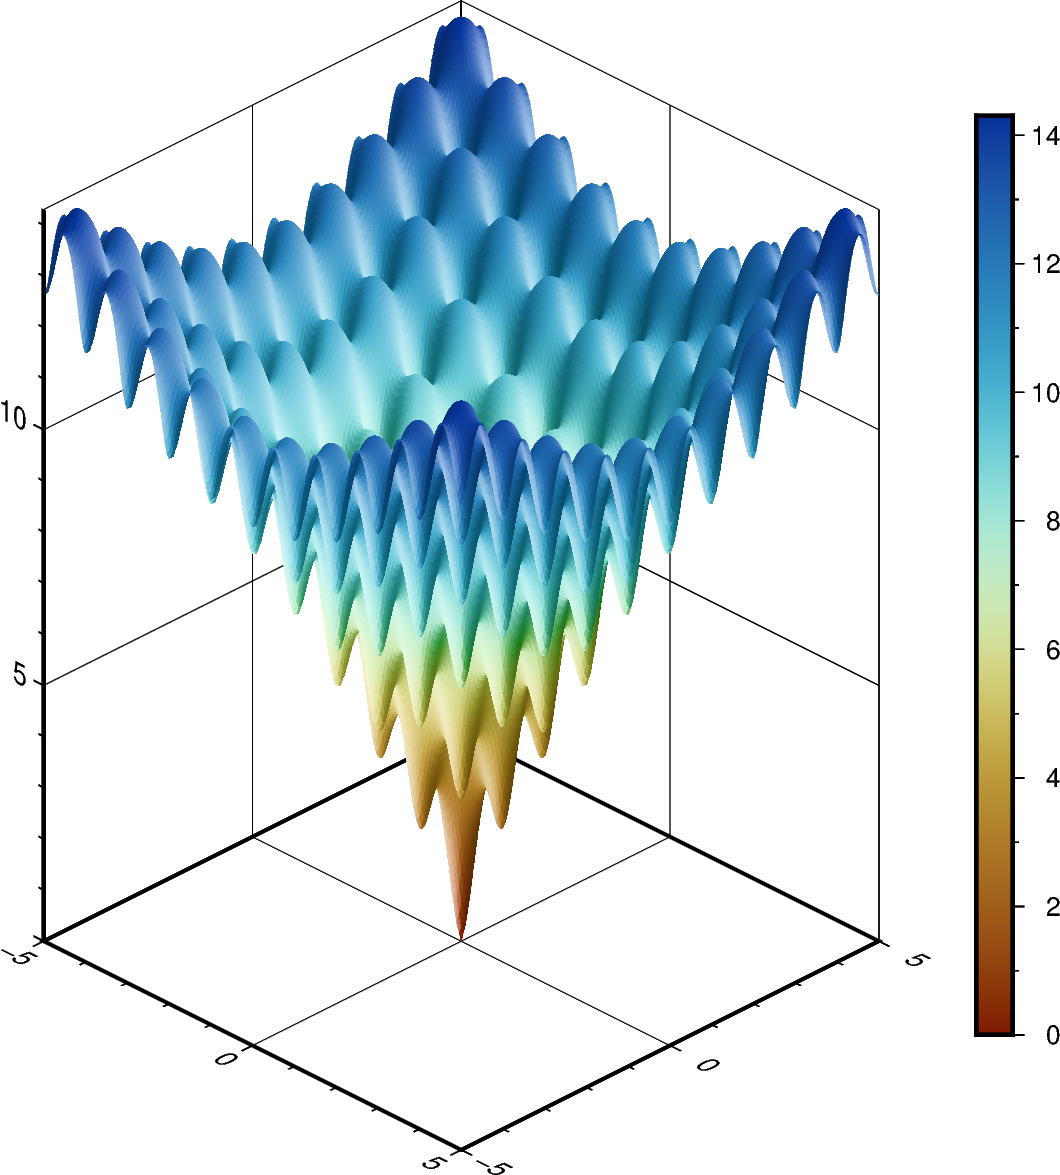

In [7]:
import numpy as np
import pygmt
import xarray as xr


# Define an interesting function of two variables, see:
# https://en.wikipedia.org/wiki/Ackley_function
def ackley(x, y):
    """
    Ackley function.
    """
    return (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
        + np.exp(1)
        + 20
    )


# Create gridded data
INC = 0.05
x = np.arange(-5, 5 + INC, INC)
y = np.arange(-5, 5 + INC, INC)
data = xr.DataArray(ackley(*np.meshgrid(x, y)), coords=(x, y))

fig = pygmt.Figure()

# Plot grid as a 3-D surface
SCALE = 0.5  # in centimeters
fig.grdview(
    data,
    # Set annotations and gridlines in steps of five, and
    # tick marks in steps of one
    frame=["a5f1g5", "za5f1g5"],
    projection=f"x{SCALE}c",
    zscale=f"{SCALE}c",
    surftype="s",
    cmap="roma",
    perspective=[135, 30],  # Azimuth southeast (135°), at elevation 30°
    shading="+a45",
)

# Add colorbar for gridded data
fig.colorbar(
    frame="a2f1",  # Set annotations in steps of two, tick marks in steps of one
    position="JMR",  # Place colorbar in the Middle Right (MR) corner
)

fig.show()

In [ ]:
import pygmt

# Define region: Indian Ocean region
region = [68, 72, 0, 30]

# Download and use the ETOPO1 bathymetry data
# Use @earth_relief_10m for medium resolution, or @earth_relief_05m for higher
grid = pygmt.datasets.load_earth_relief(resolution="10m", region=region)

# Create a 3D perspective plot using grdview
fig = pygmt.Figure()

fig.grdview(
    grid=grid,
    region=region,
    projection="M15c",  # Mercator map projection
    perspective=[140, 15],  # Azimuth and elevation (angle) of 3D view
    shading=True,  # Automatic shading
    surftype="s",  # surface plot
    frame=["xaf", "yaf", "zaf+lDepth (m)", "+t3D Bathymetry - Indian Ocean"],
    zscale="0.001",  # scale Z-axis (depth)
    cmap="geo"  # use a colormap suitable for topography/bathymetry
)

# Add colorbar
fig.colorbar(frame='af+l"Elevation (m)"')

# Show the figure
fig.show()
